# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane are the two drugs where the average tumor volume was lower.

- The only drug in which potential Outliers were found in the distribution of tumor volume for each treatment is Infubinol.

- In the analysis of only 1 mouse with capomulin, it was observed that the tumor decreased in volume between day 0 and day 40.

- According to the correlation coefficient, a positive relationship of 0.84 is observed between the weight of the mouse and the average volume of the tumor with the drug Capomulina, if the weight of the mouse increases, the volume of the tumor increases.
 
 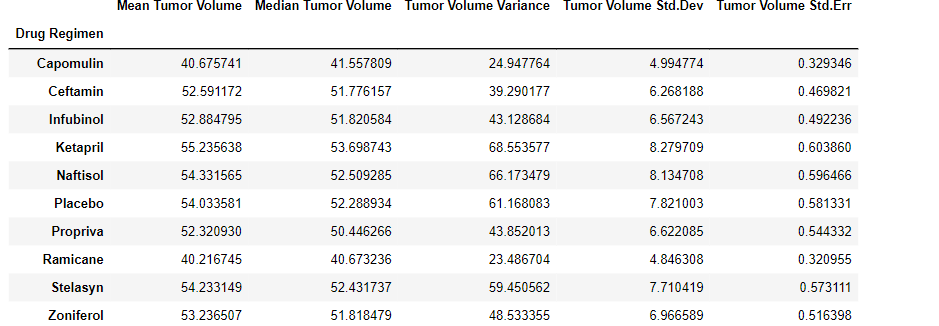
 
 
 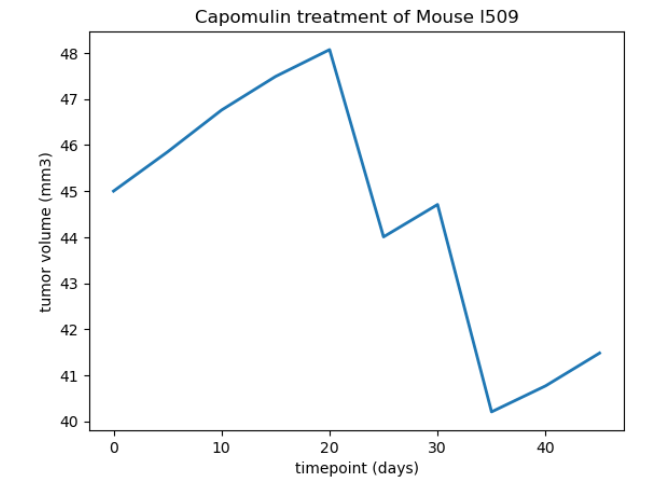
 
 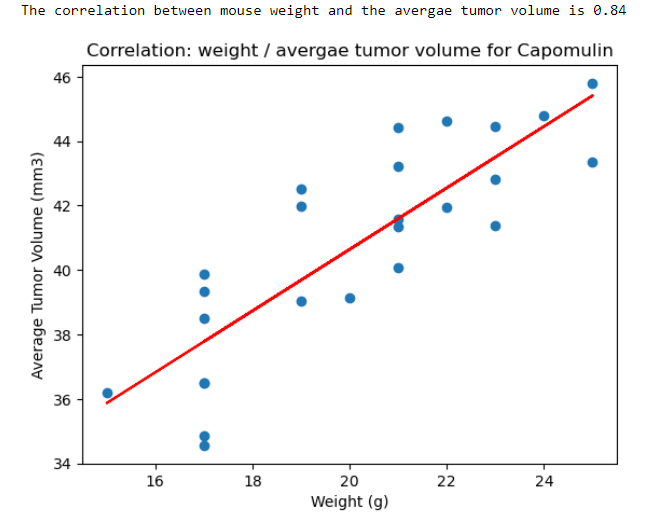

In [133]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats
import pandas as pd



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_results_complete = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])

# Reorganize the columns
organized = study_results_complete[["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites","Drug Regimen","Sex","Age_months","Weight (g)"]]

# Display the data table for preview
organized


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [134]:
# Checking the number of mice.
Mice_count = mouse_metadata["Mouse ID"].count()
Mice_count

249

In [135]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

Mice_duplicated = organized[organized.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
Mouse_unique = Mice_duplicated['Mouse ID'].unique()
Mouse_unique

array(['g989'], dtype=object)

In [136]:
# Optional: Get all the data for the duplicate mouse ID. 

Mice_duplicated_data = organized[(organized['Mouse ID'] == Mouse_unique[0])]
Mice_duplicated_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [137]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Mice_unique =  organized[organized['Mouse ID'] != Mouse_unique[0]]
Mice_unique

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [138]:
# Checking the number of mice in the clean DataFrame.
Mice = len(Mice_unique["Mouse ID"].unique())
Mice

248

## Summary Statistics

In [139]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Stat_mean = Mice_unique.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
Stat_median = Mice_unique.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
Stat_var = Mice_unique.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
Stat_std = Mice_unique.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
Stat_sem = Mice_unique.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

Summary_stat= pd.DataFrame({"Mean Tumor Volume": Stat_mean,"Median Tumor Volume": Stat_median,"Tumor Volume Variance": Stat_var,"Tumor Volume Std.Dev": Stat_std,"Tumor Volume Std.Err": Stat_sem})
Summary_stat                            

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [140]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)


Summary_stat2 = Mice_unique.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
Summary_stat2




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Mouse ID/Timepoints for each drug regimen'}, xlabel='Drug Regimen', ylabel='# Observed Mouse Timepoints'>

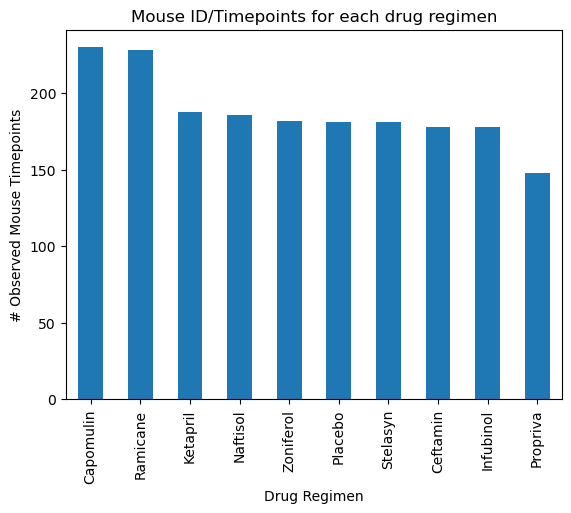

In [141]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plotdata = pd.DataFrame({"Drug Regimen": Mice_unique.groupby(["Drug Regimen"])["Mouse ID"].count().sort_values(ascending= False)})
plotdata.plot(kind="bar", ylabel='# Observed Mouse Timepoints', legend=False, title='Mouse ID/Timepoints for each drug regimen')


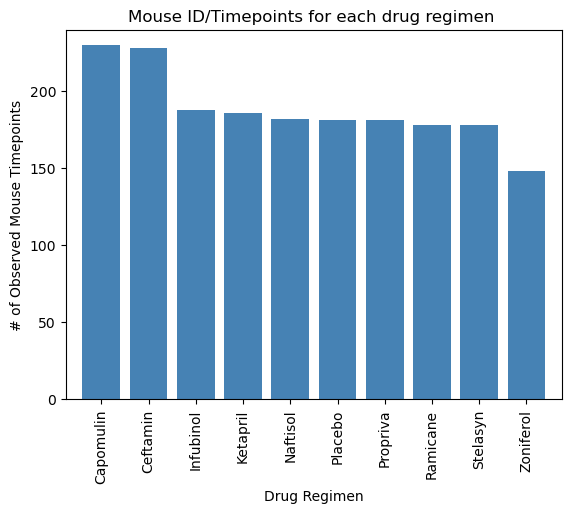

In [142]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Mouse = Mice_unique.groupby(["Drug Regimen"])["Mouse ID"].count().sort_values(ascending= False)
x_axis = np.arange(len(Mouse))
plt.bar(x_axis, Mouse, color="steelblue", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"])
plt.xticks(rotation=90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(Mouse)+10)
plt.title("Mouse ID/Timepoints for each drug regimen ")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


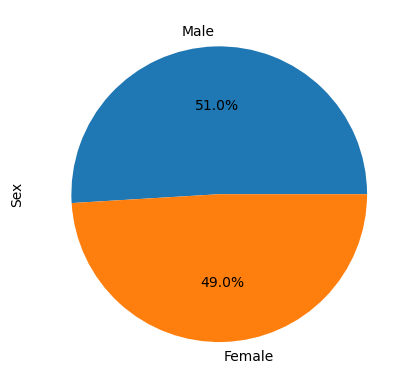

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sizes = Mice_unique["Sex"].value_counts()
sizes.plot(kind="pie", autopct ="%1.1f%%")
plt.show()

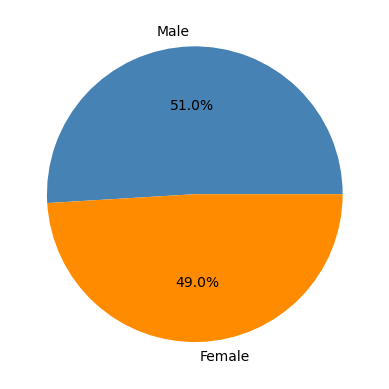

In [144]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male","Female"]

# The values of each section of the pie chart
sizes = Mice_unique["Sex"].value_counts()

# The colors of each section of the pie chart
colors = ["steelblue", "darkorange"]

# Creates the pie chart based upon the values above 
# Automatically finds the percentages of each part of the pie chart

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=0)
plt.show()


## Quartiles, Outliers and Boxplots

In [145]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Last_timepoint = Mice_unique.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Last_timepoint_complete = pd.merge(Last_timepoint, Mice_unique, how="inner", on=["Mouse ID", "Timepoint"])
Last_timepoint_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [146]:
# Put treatments into a list for for loop (and later for plot labels)
list_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
List_tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in list_treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes   
    subset = Last_timepoint_complete.loc[Last_timepoint_complete['Drug Regimen'] == drug, ['Tumor Volume (mm3)']]
    #print(subset)
    
    # add subset 
    List_tumor_data.append(subset)
    
    # Determine outliers using upper and lower bounds
    quartiles = subset['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    
    outlier_tumor_vol  = subset[(subset['Tumor Volume (mm3)'] < lower_bound) | (subset['Tumor Volume (mm3)'] > upper_bound)]
    print(f"{drug}'s potential outliers: {outlier_tumor_vol['Tumor Volume (mm3)']}")
    


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\lina_\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


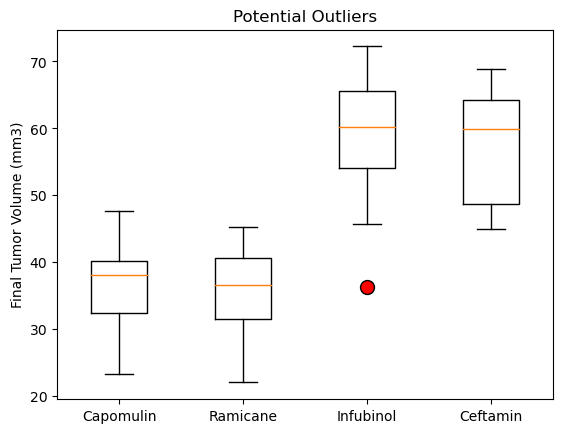

In [147]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Distribution = [List_tumor_data[0].values.flatten(),List_tumor_data[1].values.flatten(),List_tumor_data[2].values.flatten(),List_tumor_data[3].values.flatten()]
#print(Distribution)
                      
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(list_treatments)
ax1.boxplot(Distribution, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 10})
ax1.set_title('Potential Outliers')
plt.show()            
            
    

## Line and Scatter Plots

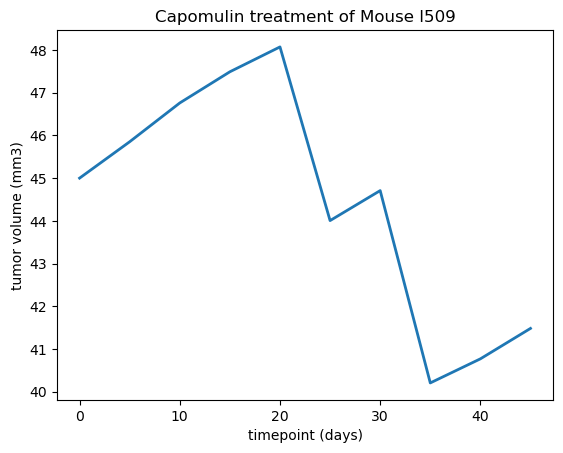

In [148]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

Mouse1 = 'l509'
column = 'Mouse ID'
Capomulin_list  = Mice_unique.loc[Mice_unique[column] == Mouse1]

x = Capomulin_list["Timepoint"]
y = Capomulin_list["Tumor Volume (mm3)"]

fig, ax = plt.subplots()
plt.plot(x, y, linewidth=2.0)

plt.title("Capomulin treatment of Mouse l509")
plt.xlabel("timepoint (days)")
plt.ylabel("tumor volume (mm3)")
plt.show()


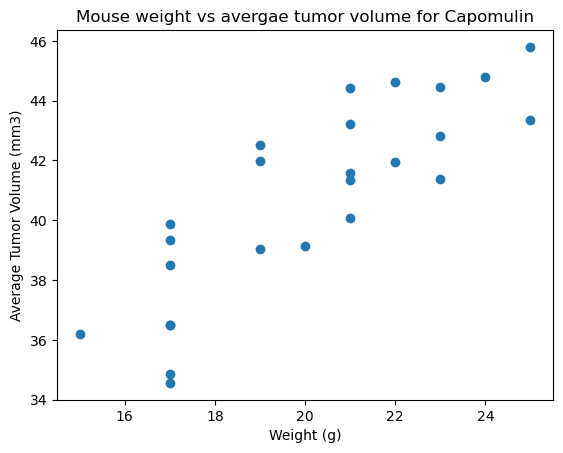

In [149]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Drug1 = 'Capomulin'
column1 = 'Drug Regimen'
 
Capomulin_list2 = Mice_unique.loc[Mice_unique[column1] == Drug1]
Average_tumor_volume = Capomulin_list2.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean()
w = Capomulin_list2.groupby(["Mouse ID","Weight (g)"])["Weight (g)"].mean()

x = w.values
y = Average_tumor_volume.values


plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Mouse weight vs avergae tumor volume for Capomulin')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the avergae tumor volume is 0.84


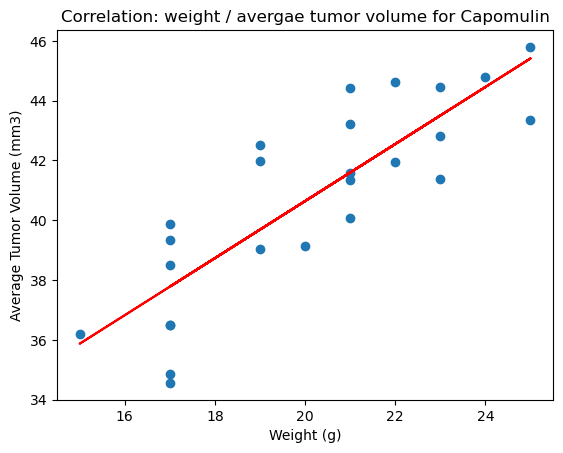

In [150]:
# Calculate the correlation coefficient and a linear regression model 

print(f"The correlation between mouse weight and the avergae tumor volume is {round(st.pearsonr(y,x)[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen

res = linregress(x, y, alternative='greater')
plt.plot(x, res.intercept + res.slope*x , 'r')
plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Correlation: weight / avergae tumor volume for Capomulin')
plt.show()